# Data Analysis on Gun Violence in US

### About Dataset
- Gun Violence Dataset Overview (Mass Shootings in 2024)
- This dataset provides an in-depth look at mass shootings across the United States in 2024, up until October 20th, sourced from the Gun Violence Archive.
- It captures essential details such as incident ID, date, state, city, victims (killed and injured), and suspects involved.
- Additionally, geographical coordinates are included to allow for spatial analysis of gun violence trends.

### Key Features of the Dataset

- Incident IDs: A unique identifier for each incident, categorized and grouped based on their range.
- Incident Date: Captures the time period over which the incidents occurred, broken down into monthly intervals.
- State and City/County: A breakdown of incidents across various states and cities, identifying regions with the most gun violence activity.
- Victims Killed and Injured: Provides a count of victims in each incident, allowing for the analysis of both fatal and non-fatal outcomes.
- Suspects Killed, Injured, and Arrested: Captures data related to suspects involved in the incidents, including their status post-incident (e.g., killed, injured, or arrested).
- Latitude and Longitude: Geographical coordinates for the locations of the incidents, enabling mapping and geospatial analysis.
- Coordinates Found: Indicates whether valid geographical coordinates were found for each incident.

In [1]:
#Loading Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset
df = pd.read_csv("Dataset/gun.csv")

In [3]:
df.head()

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Latitude,Longitude,Coordinates_Found
0,3052758,"October 21, 2024",Washington,Fall City,7700 block of Lake Alice Rd SE,5,1,0,0,1,NaN,47.56812,-121.89086,Yes
1,3052028,"October 20, 2024",Tennessee,Jackson,2310 N Highland Ave,1,8,0,0,0,NaN,35.61390,-88.81940,Yes
2,3051984,"October 20, 2024",Louisiana,Baton Rouge,9700 block of Greenwell Springs Rd,0,5,0,0,0,NaN,30.44335,-91.18664,Yes
3,3051041,"October 19, 2024",Pennsylvania,Philadelphia,2517 N Jessup St,0,7,0,0,0,NaN,39.95222,-75.16218,Yes
4,3050940,"October 19, 2024",Mississippi,Lexington,24904 MS-17,3,8,0,0,0,NaN,33.11464,-90.05281,Yes


In [4]:
df.columns

Index(['Incident ID', 'Incident Date', 'State', 'City Or County', 'Address',
       'Victims Killed', 'Victims Injured', 'Suspects Killed',
       'Suspects Injured', 'Suspects Arrested', 'Operations', 'Latitude',
       'Longitude', 'Coordinates_Found'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Incident ID        427 non-null    int64  
 1   Incident Date      427 non-null    object 
 2   State              427 non-null    object 
 3   City Or County     427 non-null    object 
 4   Address            426 non-null    object 
 5   Victims Killed     427 non-null    int64  
 6   Victims Injured    427 non-null    int64  
 7   Suspects Killed    427 non-null    int64  
 8   Suspects Injured   427 non-null    int64  
 9   Suspects Arrested  427 non-null    int64  
 10  Operations         0 non-null      float64
 11  Latitude           427 non-null    float64
 12  Longitude          427 non-null    float64
 13  Coordinates_Found  427 non-null    object 
dtypes: float64(3), int64(6), object(5)
memory usage: 46.8+ KB


In [6]:
df.describe()

,Incident ID,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Latitude,Longitude
count,4.270000e+02,427.000000,427.000000,427.000000,427.000000,427.000000,0.0,427.000000,427.000000
mean,2.929432e+06,1.000000,4.437939,0.070258,0.063232,0.711944,NaN,36.941819,-88.791959
std,6.876031e+04,1.210285,2.849555,0.264896,0.271030,1.178414,NaN,4.934289,12.976850
min,2.791411e+06,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,21.449910,-166.739450
25%,2.879320e+06,0.000000,3.000000,0.000000,0.000000,0.000000,NaN,33.449545,-91.910580
50%,2.939030e+06,1.000000,4.000000,0.000000,0.000000,0.000000,NaN,37.687490,-86.811790
75%,2.982807e+06,1.000000,5.000000,0.000000,0.000000,1.000000,NaN,40.692450,-80.735325
max,3.052758e+06,8.000000,28.000000,2.000000,2.000000,7.000000,NaN,68.349440,-70.256650


In [8]:
df.isna().sum()

Incident ID            0
Incident Date          0
State                  0
City Or County         0
Address                1
Victims Killed         0
Victims Injured        0
Suspects Killed        0
Suspects Injured       0
Suspects Arrested      0
Operations           427
Latitude               0
Longitude              0
Coordinates_Found      0
dtype: int64

In [9]:
df.shape

(427, 14)

In [12]:
df.drop(df[['Address','Operations']], axis=1,inplace=True)

In [13]:
df.head()

,Incident ID,Incident Date,State,City Or County,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Latitude,Longitude,Coordinates_Found
0,3052758,"October 21, 2024",Washington,Fall City,5,1,0,0,1,47.56812,-121.89086,Yes
1,3052028,"October 20, 2024",Tennessee,Jackson,1,8,0,0,0,35.61390,-88.81940,Yes
2,3051984,"October 20, 2024",Louisiana,Baton Rouge,0,5,0,0,0,30.44335,-91.18664,Yes
3,3051041,"October 19, 2024",Pennsylvania,Philadelphia,0,7,0,0,0,39.95222,-75.16218,Yes
4,3050940,"October 19, 2024",Mississippi,Lexington,3,8,0,0,0,33.11464,-90.05281,Yes


In [15]:
df.isna().sum()

Incident ID          0
Incident Date        0
State                0
City Or County       0
Victims Killed       0
Victims Injured      0
Suspects Killed      0
Suspects Injured     0
Suspects Arrested    0
Latitude             0
Longitude            0
Coordinates_Found    0
dtype: int64

In [16]:
df.shape

(427, 12)

#### 1. What is the total number of incidents in the dataset?

In [17]:
total_incidents = df.shape[0]
print(f"Total number of incidents: {total_incidents}")

Total number of incidents: 427


#### 2.State with the highest number of incidents

In [19]:
highest_incidents = df['State'].value_counts().idxmax()
print(f"State with the highest number of incidents: {highest_incidents}")


State with the highest number of incidents: Illinois


#### 3. Total number of victims killed and injured


In [23]:
total_victims_killed = df['Victims Killed'].sum()
total_victims_injured = df['Victims Injured'].sum()
print(f"Total victims killed: {total_victims_killed},\nTotal victims injured: {total_victims_injured}")


Total victims killed: 427,
Total victims injured: 1895


#### 4. Average number of suspects arrested per incident


In [24]:
average_suspects_arrested = df['Suspects Arrested'].mean()
print(f"Average suspects arrested per incident: {average_suspects_arrested:.2f}")

Average suspects arrested per incident: 0.71


#### 5. Number of incidents by year


In [26]:
df['Incident Year'] = pd.to_datetime(df['Incident Date']).dt.year
incidents_by_year = df['Incident Year'].value_counts()
print("Number of incidents by year: ")
print(incidents_by_year)


Number of incidents by year: 
2024    427
Name: Incident Year, dtype: int64


#### 6. Coordinates of the incident with the highest total victims (killed + injured)

In [27]:

df['Total Victims'] = df['Victims Killed'] + df['Victims Injured']
most_affected_coordinates = df.loc[df['Total Victims'].idxmax(), ['Latitude', 'Longitude']]
print("Coordinates of the most affected incident:")
print(most_affected_coordinates)

Coordinates of the most affected incident:
Latitude     41.08431
Longitude   -81.51431
Name: 233, dtype: object


## Data Visualization using Mayavi and python

In [29]:
!pip install mayavi

     ---------------------------------------- 0.0/7.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.1 MB 682.7 kB/s eta 0:00:11
     - -------------------------------------- 0.3/7.1 MB 3.5 MB/s eta 0:00:02
     -------- ------------------------------- 1.5/7.1 MB 11.0 MB/s eta 0:00:01
     --------------- ------------------------ 2.8/7.1 MB 16.0 MB/s eta 0:00:01
     ------------------ --------------------- 3.2/7.1 MB 14.7 MB/s eta 0:00:01
     ------------------------ --------------- 4.4/7.1 MB 15.5 MB/s eta 0:00:01
     ----------------------------- ---------- 5.2/7.1 MB 16.5 MB/s eta 0:00:01
     ----------------------------------- ---- 6.3/7.1 MB 17.5 MB/s eta 0:00:01
     ---------------------------------------- 7.1/7.1 MB 17.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  

In [31]:
!pip install configobj

     ---------------------------------------- 0.0/101.5 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/101.5 kB ? eta -:--:--
     ----------------------------------- --- 92.2/101.5 kB 1.3 MB/s eta 0:00:01
     ------------------------------------ 101.5/101.5 kB 981.5 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for configobj: filename=configobj-5.0.9-py2.py3-none-any.whl size=35637 sha256=7a3d079eb3b69ee73d7ca275a5d3ea154758fed8ca333d91f5c07b2207a93878
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\64\0b\d9\9347fb191ffdc88f4b0146338d157b9616de47ddfd93cd2481
Successfully built configobj


In [32]:
from mayavi import mlab
# Geospatial Heatmap
latitudes = df['Latitude']
longitudes = df['Longitude']
victim_counts = df['Victims Killed'] + df['Victims Injured']

# 3D Scatter plot
mlab.figure(size=(800, 600))
mlab.points3d(latitudes, longitudes, victim_counts,
              victim_counts,
              scale_mode='none',
              scale_factor=10,
              colormap='coolwarm')
mlab.axes(xlabel='Latitude', ylabel='Longitude', zlabel='Victim Counts')
mlab.title("Geospatial Heatmap of Incidents")
mlab.show()

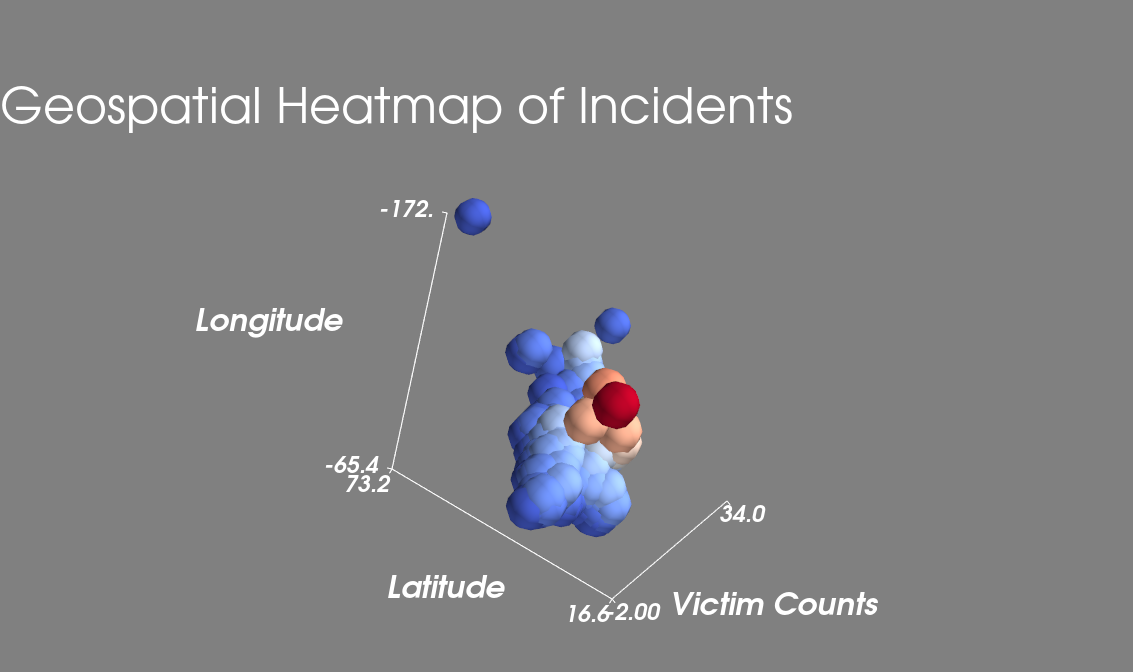

In [39]:
from IPython.display import Image, display

# Display an image
image_path = "Images\Geospatial Output.png"
display(Image(filename=image_path))


In [41]:
# Suspect Statistics
states = df['State'].unique()
suspect_counts = df.groupby('State')['Suspects Arrested'].sum()

x = np.arange(len(states))
y = suspect_counts.values

mlab.figure(size=(800, 600))
mlab.barchart(x, y, np.zeros_like(y), colormap='cool', color=(0.5, 0.5, 1.0))
mlab.axes(xlabel='States', ylabel='Suspect Counts', zlabel='Counts')
mlab.title("Suspect Statistics by State")
mlab.show()

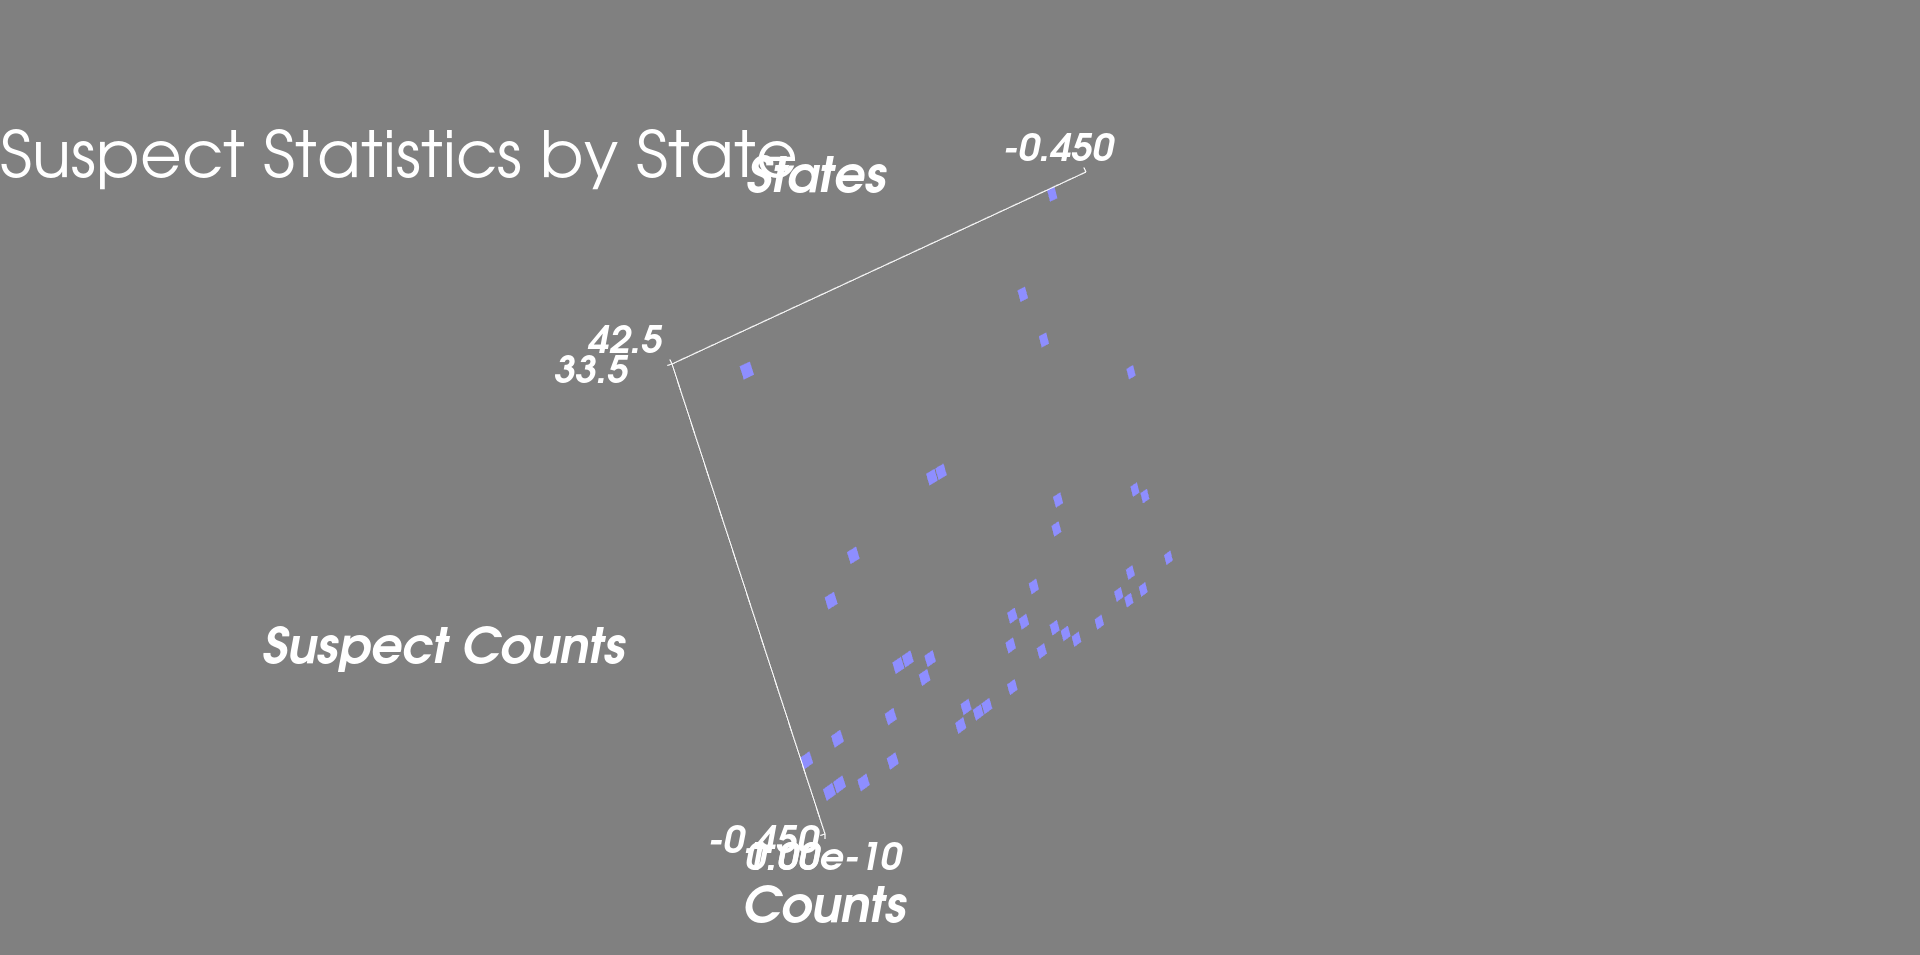

In [40]:
# Display an image
image_path = "Images\Suspect Output.png"  # Replace with your image path
display(Image(filename=image_path))

In [47]:
# Temporal Trend

# Data preparation
years = df['Incident Year'].unique()
states = df['State'].unique()
incident_counts = df.groupby(['Incident Year', 'State']).size().unstack(fill_value=0)

x, y = np.meshgrid(range(len(years)), range(len(states)))
z = incident_counts.values.T

# 3D Bar plot
mlab.figure(size=(800, 600))
mlab.barchart(x, y, z, colormap='viridis')
mlab.axes(xlabel='Years', ylabel='States', zlabel='Incident Counts')
mlab.title("Incidents Across Years and States")
mlab.show()


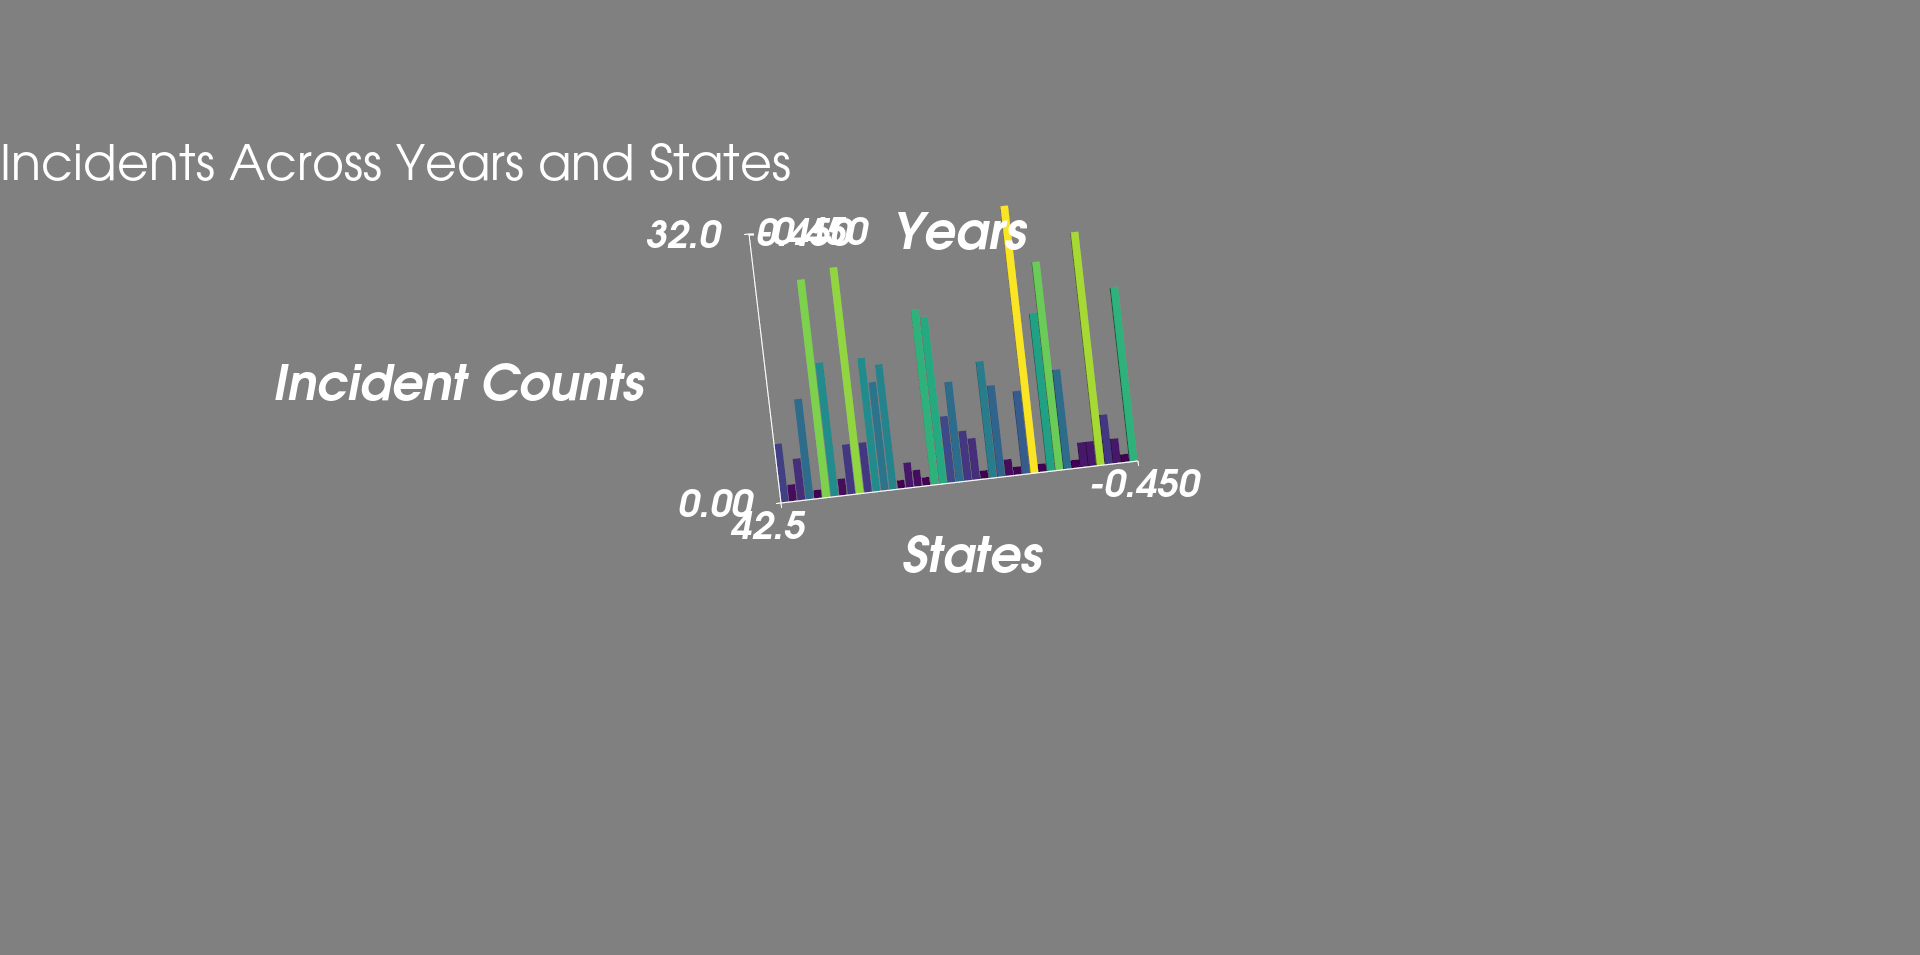

In [48]:
# Display an image
image_path = "Images\incident.png"  # Replace with your image path
display(Image(filename=image_path))

## Conclusion on the Dataset

- Geospatial Clustering of Incidents: The analysis revealed geographic hotspots where incidents are more frequent, helping identify areas with high criminal activity or risk.

- Impact Analysis by Location: Visualizing the number of victims killed, injured, or suspects arrested across different regions provides insights into the severity of incidents in specific areas.

- Risk Zones Identification: By creating buffers around key locations, we can identify high-risk zones that require increased attention or resources for intervention.

- Region-Based Aggregation: Summarizing incident data by cities, counties, or states helps prioritize areas with the most incidents, guiding law enforcement and resource allocation.

- Effectiveness of Law Enforcement Operations: Mapping the operations and arrests in relation to incidents shows the effectiveness of law enforcement in addressing crime in high-density areas.

- Comparative Analysis of Regions: Comparing incident rates between neighboring regions helps highlight disparities in crime or emergency incidents, offering a foundation for targeted policies.

- Enhanced Decision-Making for Policy Makers: The spatial analysis and visualizations provide valuable insights for policy makers to improve crime prevention strategies and optimize resource distribution.